In [2]:
library(arrow)
library(tzdb)
library(pheatmap)
library(MASS)
library(ca)
library(RColorBrewer)
library(FactoMineR)
library(factoextra)


Dołączanie pakietu: 'arrow'


Następujący obiekt został zakryty z 'package:utils':

    timestamp


Ładowanie wymaganego pakietu: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
# Tworzenie ramki danych z danymi wyborczymi
wybory <- data.frame(
  Region = c("Auvergne-Rhône-Alpes", "Bourgogne-Franche-Comté", "Bretagne", "Centre-Val de Loire", "Corse"),
  Le_Pen = c(943294, 409639, 385393, 347845, 42283),
  Macron = c(1175085, 394117, 647172, 383851, 26795),
  Mélenchon = c(897434, 277899, 407527, 251259, 19779),
  Abstention = c(1228490, 456682, 543425, 459528, 90636)
)

# Tworzenie macierzy kontyngencji
dane <- as.matrix(wybory[, -1]) # Usunięcie kolumny 'Region' dla macierzy kontyngencji
rownames(dane) <- wybory$Region

colSums(dane)
head(dane)

Le_Pen     Macron  Mélenchon Abstention 
   2128454    2627020    1853898    2778761

,Le_Pen,Macron,Mélenchon,Abstention
Auvergne-Rhône-Alpes,943294,1175085,897434,1228490
Bourgogne-Franche-Comté,409639,394117,277899,456682
Bretagne,385393,647172,407527,543425
Centre-Val de Loire,347845,383851,251259,459528
Corse,42283,26795,19779,90636


In [4]:
chisq.test(dane)


	Pearson's Chi-squared test

data:  dane
X-squared = 102736, df = 12, p-value < 2.2e-16


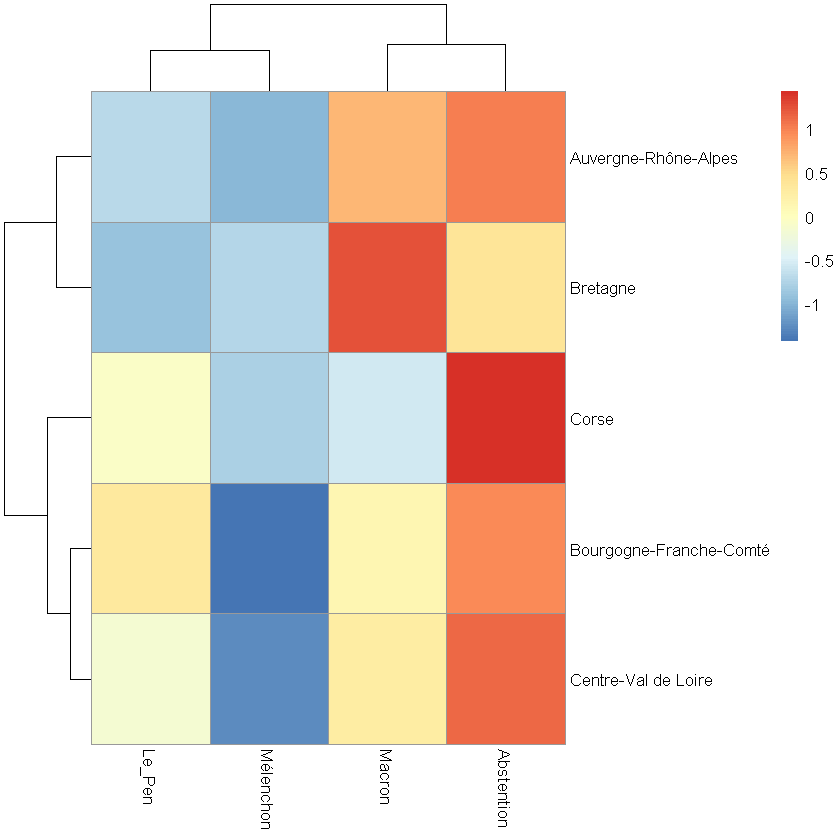

In [5]:
pheatmap(dane, scale = "row")

In [6]:
chisq.test(dane)


	Pearson's Chi-squared test

data:  dane
X-squared = 102736, df = 12, p-value < 2.2e-16


## Mapa reszt personowskich

Na tej podstawie mozemy obserowowac w ktorych regionach kandydaci mieli najwieksze poparcie

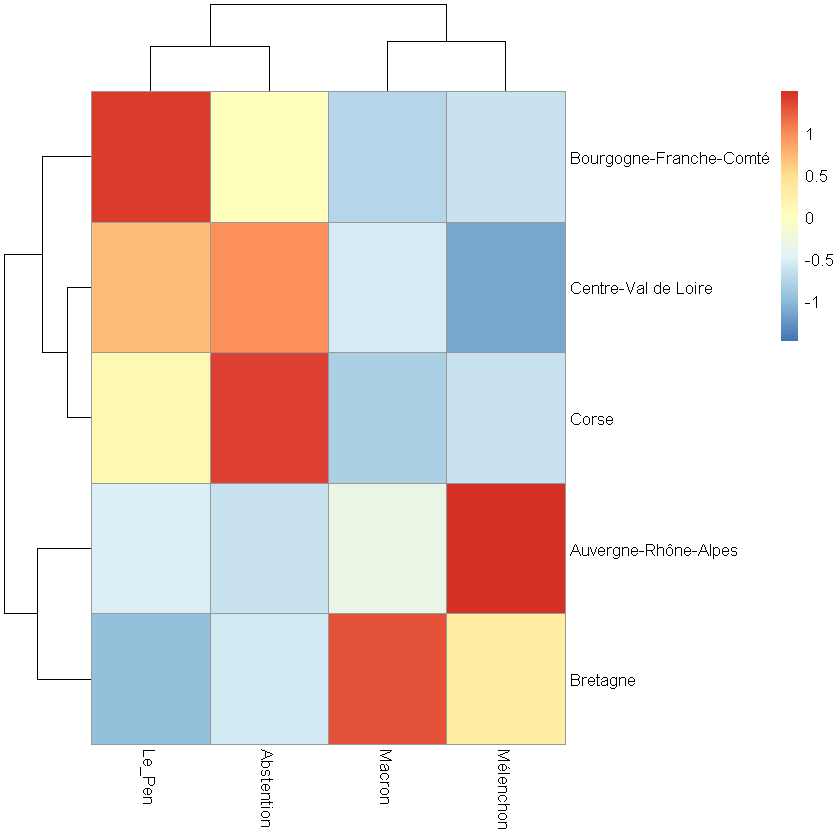

In [31]:
P = dane/sum(dane)
PP = outer(rowSums(P),colSums(P))
E = (P-PP)/sqrt(PP)
pheatmap(E, scale = "row")

## Analiza korespondencji z użyciem pakietu MASS



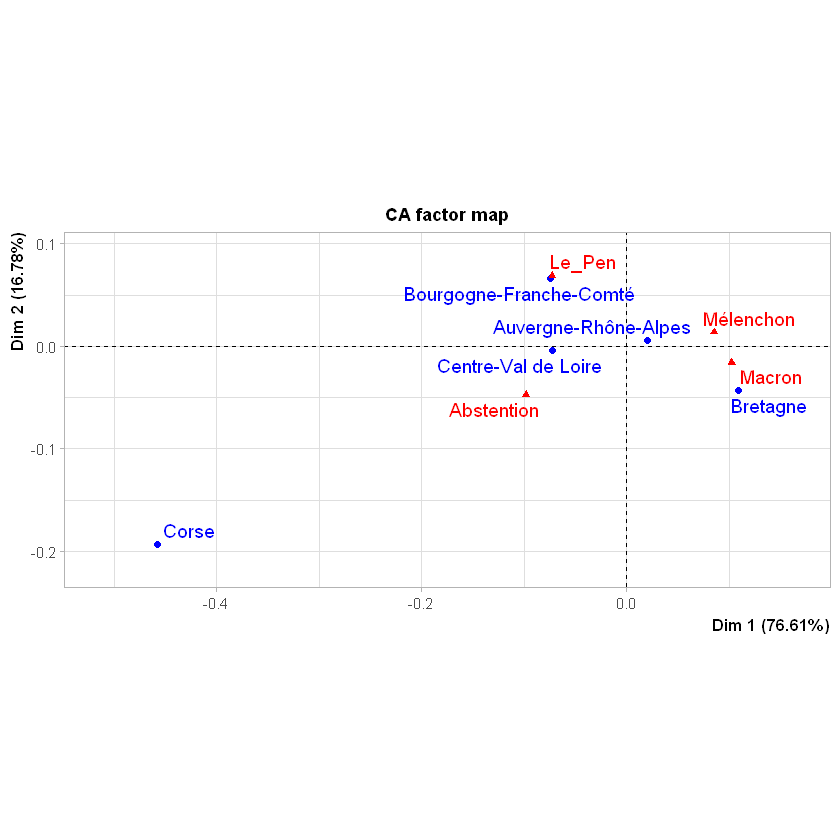

Warning message in abbreviate(rnames.temp, 4):
"'abbreviate' użyte ze znakami nie będącymi ASCII"
Warning message in abbreviate(cnames.temp, 4):
"'abbreviate' użyte ze znakami nie będącymi ASCII"



Principal inertias (eigenvalues):

 dim    value      %   cum%   scree plot               
 1      0.008383  76.6  76.6  *******************      
 2      0.001837  16.8  93.4  ****                     
 3      0.000723   6.6 100.0  **                       
        -------- -----                                 
 Total: 0.010943 100.0                                 


Rows:
    name   mass  qlt  inr    k=1 cor ctr    k=2 cor ctr  
1 | AvRA |  452  351   52 |  -20 326  22 |   -6  25   8 |
2 | BrFC |  164  956  155 |   74 534 108 |  -66 422 389 |
3 | Brtg |  211  951  276 | -108 823 297 |   43 129 212 |
4 | CnVL |  154  871   85 |   73 868  96 |    4   3   1 |
5 | Cors |   19  997  432 |  457 846 477 |  194 151 390 |

Columns:
    name   mass  qlt  inr    k=1 cor ctr    k=2 cor ctr  
1 | L_Pn |  227  986  210 |   72 517 142 |  -69 468 586 |
2 | Mcrn |  280  926  296 | -102 904 349 |   16  22  40 |
3 | Mlnc |  197  769  174 |  -85 748 170 |  -14  20  21 |
4 | Abst |  296  998  320 |   

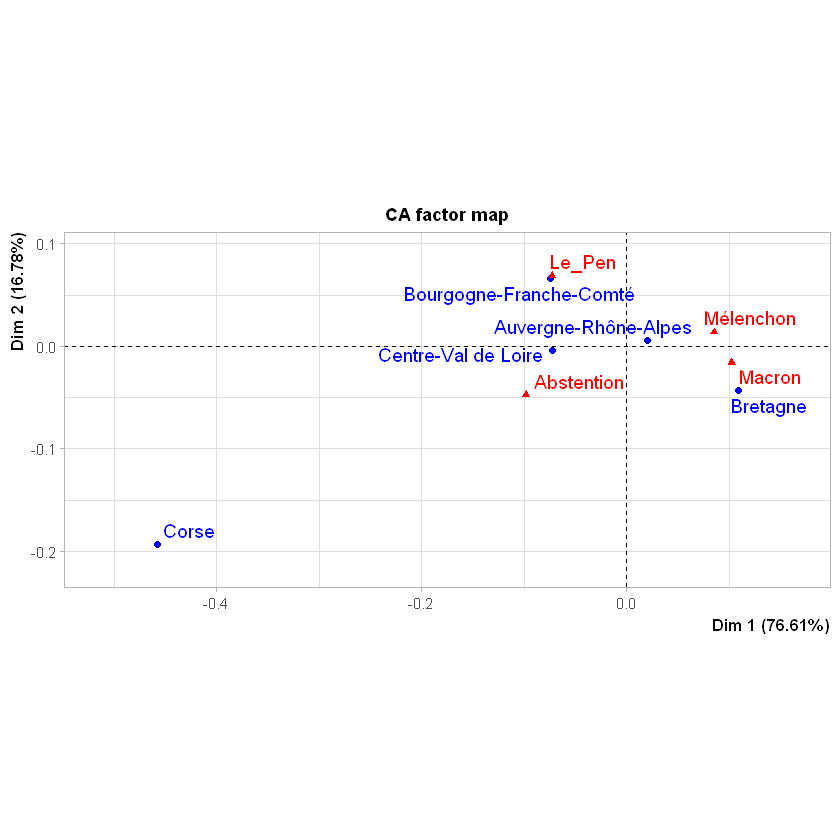

In [7]:
plot(CA(dane), mass=c(T,T))
summary(ca(dane))


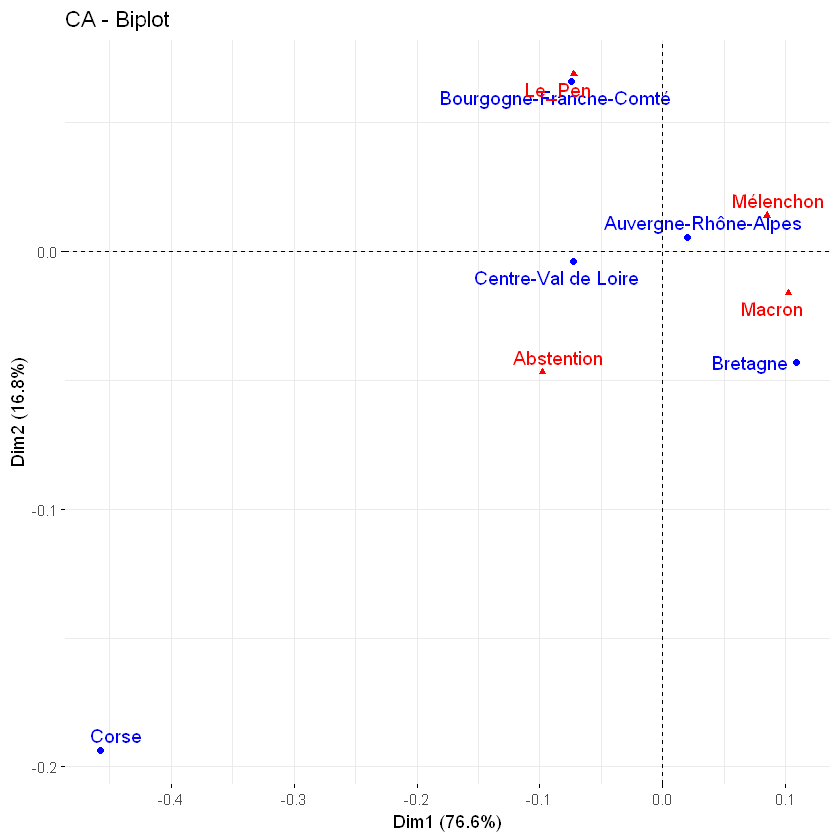

In [5]:
ca <- CA(dane, ncp = 3, graph = FALSE)

# Wizualizacja wyników
fviz_ca_biplot(ca, repel = TRUE)

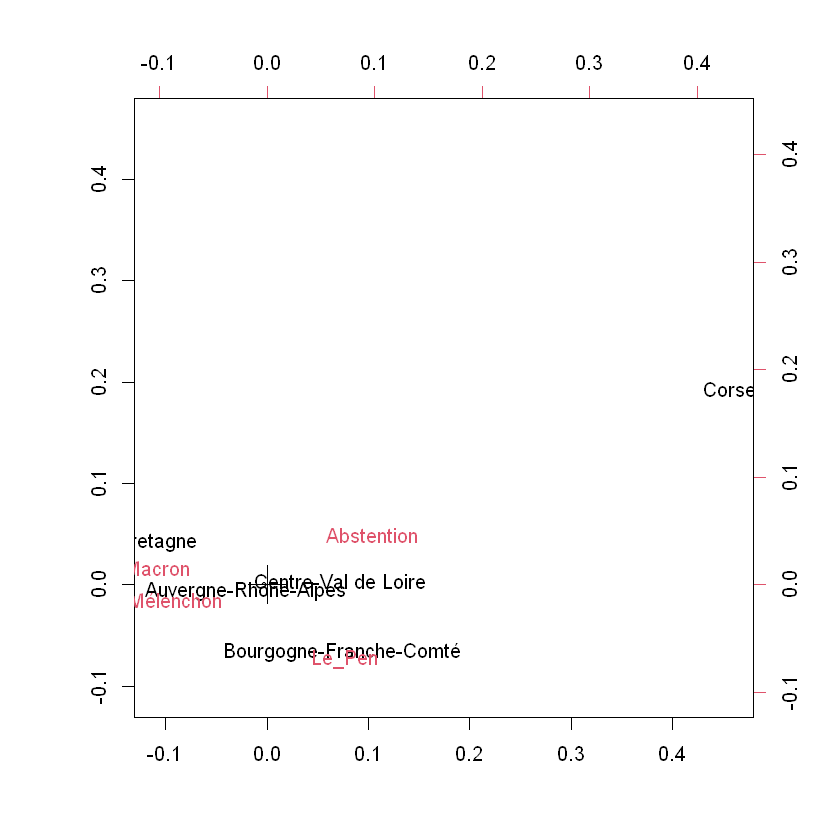

In [14]:
biplot(MASS::corresp(dane, nf = 2))

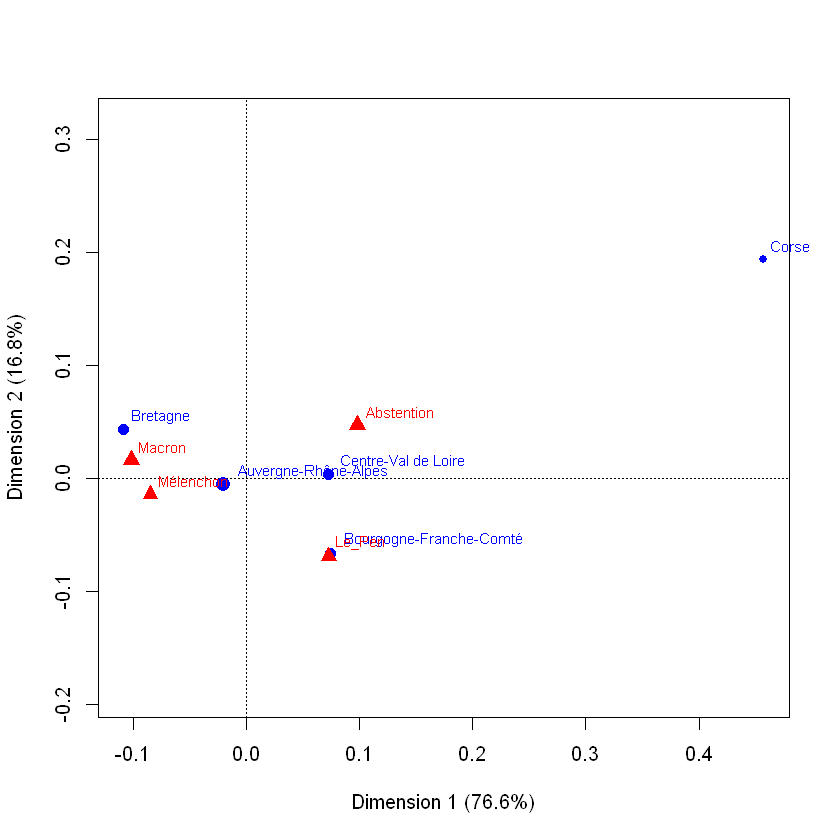

In [15]:
plot(ca::ca(dane), mass=c(T,T))